In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as pdr
import quantstats as qs #type:ignore
import datetime

In [102]:
yf.pdr_override()

aapl = pdr.data.get_data_yahoo('AAPL', start= datetime.datetime(2020, 1, 1), end = datetime.datetime(2024, 1, 1))
aapl.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960472,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251137,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484337,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200


In [103]:
ma = 21
aapl['Returns'] = np.log(aapl['Close']).diff()
aapl['MA'] = aapl['Close'].rolling(ma).mean()

aapl['Ratio'] = aapl['Close'] / aapl['MA']

In [104]:
aapl['Ratio'].describe()

count    986.000000
mean       1.009712
std        0.048553
min        0.827806
25%        0.978221
50%        1.014938
75%        1.041107
max        1.149429
Name: Ratio, dtype: float64

In [105]:
percentiles = [5, 10, 50, 90, 95]
p = np.percentile(aapl['Ratio'].dropna(), percentiles)
print(p)

[0.92971826 0.94162612 1.01493818 1.06734805 1.08041476]


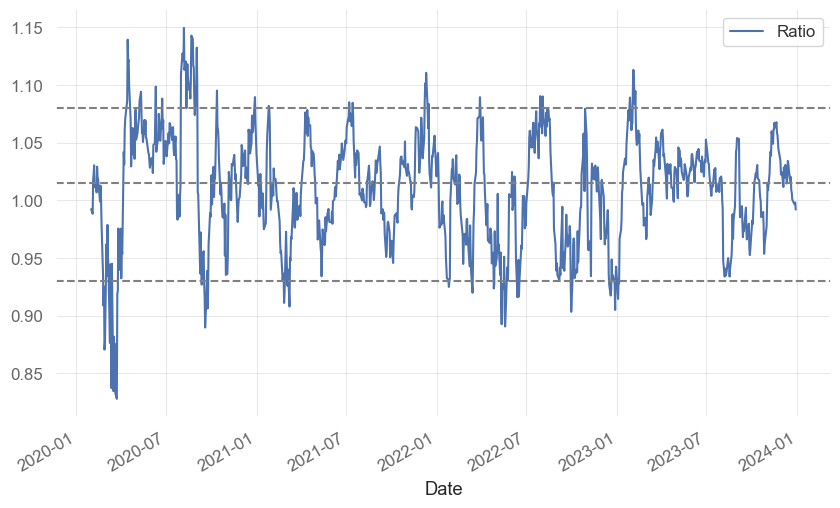

In [106]:
aapl['Ratio'].dropna().plot(legend=True)
plt.axhline(p[0], c=(.5, .5, .5), ls='--')
plt.axhline(p[2], c=(.5, .5, .5), ls='--')
plt.axhline(p[-1], c=(.5, .5, .5), ls='--')

In [107]:
short_pos = p[1]
long_pos = p[-1]
aapl['Position'] = np.where(aapl.Ratio > short_pos, -1, np.nan)
aapl['Position'] = np.where(aapl.Ratio < long_pos, 1, aapl['Position'])

In [108]:
aapl['Position'] = aapl['Position'].ffill()

<Axes: xlabel='Date'>

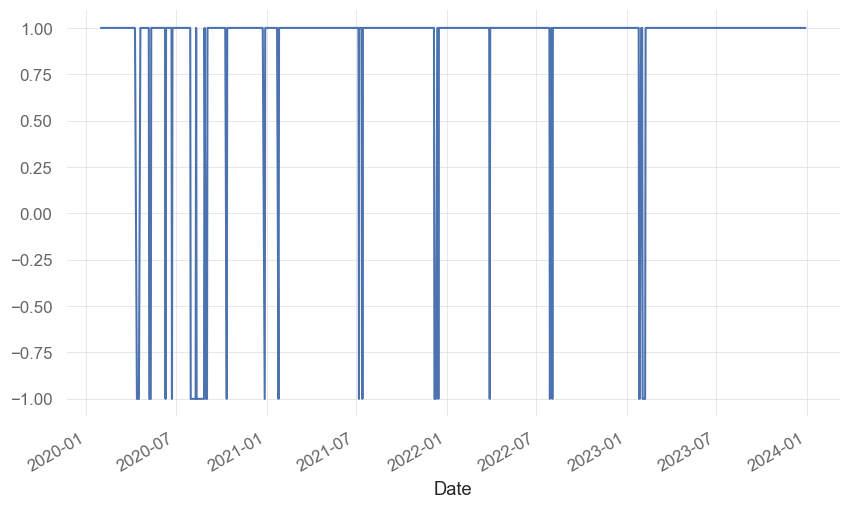

In [109]:
aapl.Position.dropna().plot()

In [110]:
aapl['Strategy Returns'] = aapl['Returns'] * aapl['Position'].shift()

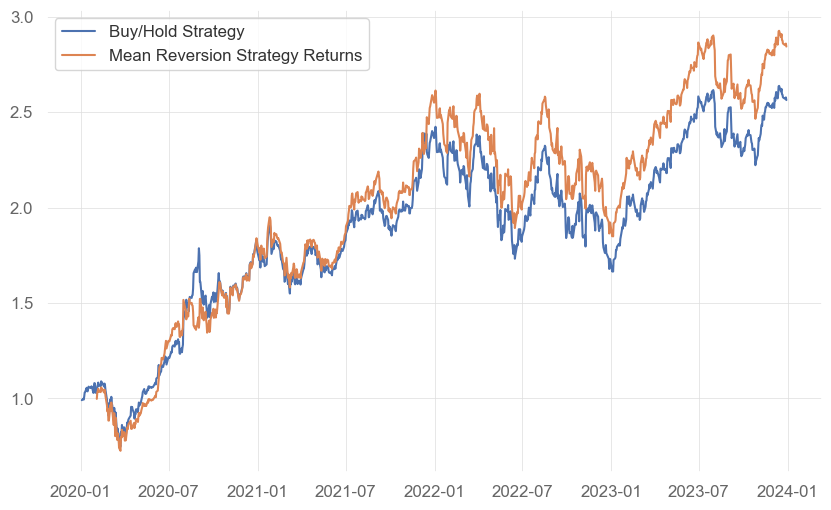

In [111]:
plt.plot(np.exp(aapl['Returns'].dropna()).cumprod(), label = "Buy/Hold Strategy")
plt.plot(np.exp(aapl['Strategy Returns'].dropna()).cumprod(), label = "Mean Reversion Strategy Returns")
plt.legend()

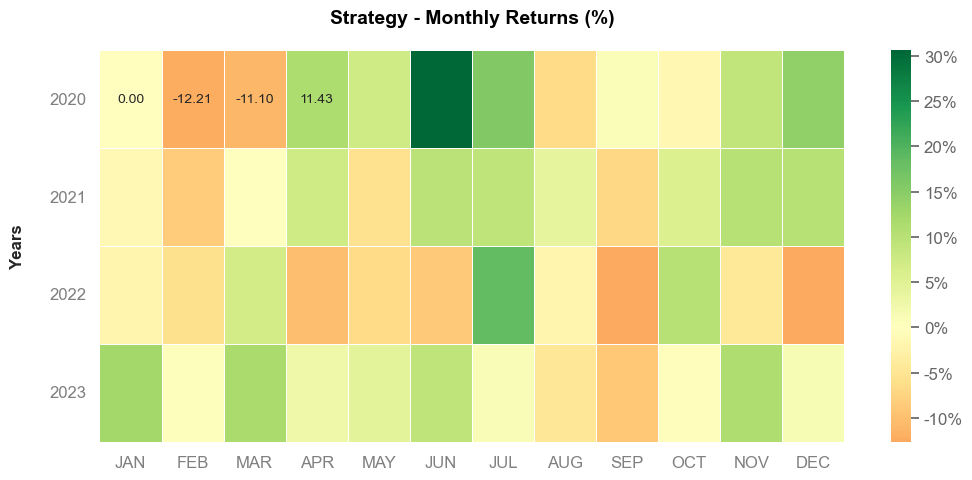

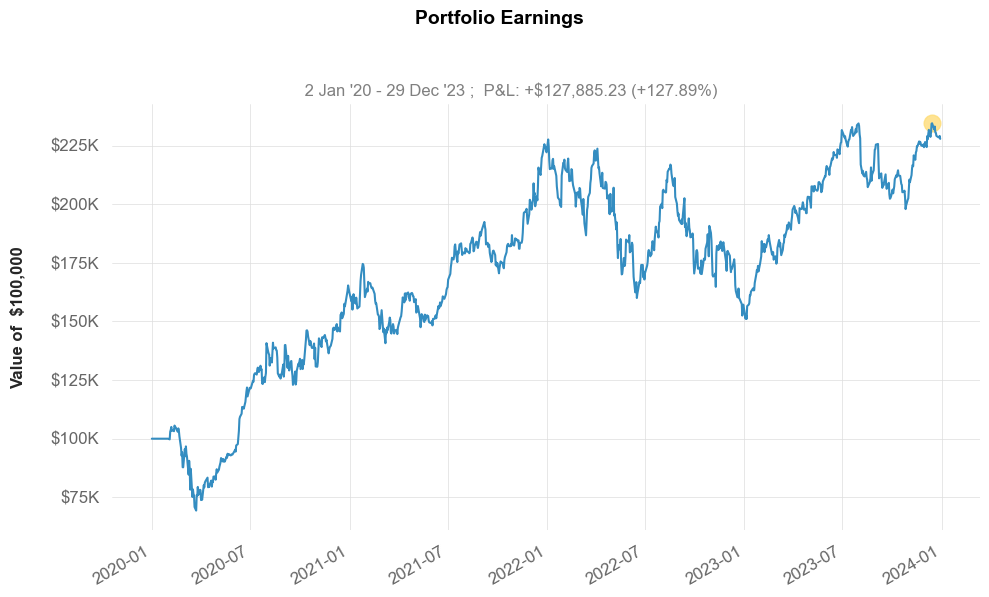

In [114]:
# Monthly Returns Heatmap
qs.plots.monthly_returns(aapl['Strategy Returns'])

# Earnings Curve
qs.plots.earnings(aapl['Strategy Returns'])